In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option("display.max_columns", None)

## Import data

In [2]:
INPUT_FILE = '../data/5_histogram.csv'

In [3]:
def read_file(fpath):
    fobj = open(fpath, 'r')
    data = fobj.read()
    fobj.close()
    return [line.split(',') for line in data.split('\n')]

In [4]:
data = read_file(INPUT_FILE)[:-1]

In [5]:
columns = data[0]

In [6]:
df = pd.DataFrame(data[2:], columns=columns)

In [7]:
df

,Block#,Gas used,STOP,ADD,MUL,SUB,DIV,SDIV,MOD,SMOD,ADDMOD,MULMOD,EXP,SIGNEXTEND,-,-,-,-,LT,GT,SLT,SGT,EQ,ISZERO,AND,OR,XOR,NOT,BYTE,SHL,SHR,SAR,-,-,KECCAK256,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,ADDRESS,BALANCE,ORIGIN,CALLER,CALLVALUE,CALLDATALOAD,CALLDATASIZE,CALLDATACOPY,CODESIZE,CODECOPY,GASPRICE,EXTCODESIZE,EXTCODECOPY,RETURNDATASIZE,RETURNDATACOPY,EXTCODEHASH,BLOCKHASH,COINBASE,TIMESTAMP,NUMBER,DIFFICULTY,GASLIMIT,CHAINID,SELFBALANCE,-,-,-,-,-,-,-,-,POP,MLOAD,MSTORE,MSTORE8,SLOAD,SSTORE,JUMP,JUMPI,PC,MSIZE,GAS,JUMPDEST,-,-,-,-,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,DUP1,DUP2,DUP3,DUP4,DUP5,DUP6,DUP7,DUP8,DUP9,DUP10,DUP11,DUP12,DUP13,DUP14,DUP15,DUP16,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP6,SWAP7,SWAP8,SWAP9,SWAP10,SWAP11,SWAP12,SWAP13,SWAP14,SWAP15,SWAP16,LOG0,LOG1,LOG2,LOG3,LOG4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,CREATE,CALL,CALLCODE,RETURN,DELEGATECALL,CREATE2,-,-,-,-,STATICCALL,-,-,REVERT,INVALID,SELFDESTRUCT,PUSH0
0,12205970,12279594,138,11089,1873,3848,1442,0,3,0,0,0,288,0,0,0,0,0,3260,2038,103,8,4308,7682,8930,422,25,383,1,1568,414,0,0,0,1396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,1,5,611,532,1739,933,146,0,72,1,285,0,633,118,5,0,1,102,20,0,1,22,18,0,0,0,0,0,0,0,0,21771,6479,8105,0,1602,660,8825,13609,12,0,466,18958,0,0,0,0,30981,23455,65,5338,182,1,2,225,0,0,0,46,5,754,194,9,5,0,6,3558,23,0,0,6,0,0,0,292,351,0,0,1427,14217,12909,8775,5763,4543,2160,1137,930,891,425,331,239,120,105,16,10,14641,8277,4782,1492,773,569,345,191,294,85,103,7,3,1,1,0,0,47,33,228,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243,0,394,39,0,0,0,0,0,185,0,0,11,0,4,7745
1,12205971,12469595,154,13521,1924,4420,2062,0,9,0,0,1,764,0,0,0,0,0,3606,2419,106,7,5546,9298,9901,569,5,442,1,1670,412,0,0,0,1558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,2,1,677,581,1994,1027,175,9,95,0,323,0,641,115,7,0,3,97,16,0,1,0,23,0,0,0,0,0,0,0,0,24383,8104,9842,16,1901,673,10011,15880,5,0,476,21035,0,0,0,0,36202,28027,120,6696,180,1,4,180,2,0,0,11,35,736,191,3,9,0,3,3689,18,4,0,2,1,0,1,286,411,0,0,1519,16663,15600,9940,6805,4824,2350,1431,952,827,449,375,251,175,140,52,24,17240,9272,5029,1664,908,641,310,235,300,115,123,11,4,1,1,0,0,44,31,239,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,231,0,444,48,0,0,0,0,0,208,0,0,6,0,0,8514
2,12205972,12470726,180,12765,1969,4666,1628,2,14,0,0,0,662,46,0,0,0,0,3311,2244,206,18,4752,8534,10423,537,16,583,1,2252,574,4,0,0,1646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,1,2,723,606,1995,1164,175,0,69,1,373,0,699,130,1,0,1,87,27,0,0,0,16,0,0,0,0,0,0,0,0,23558,6971,9513,0,2087,779,9332,14546,10,0,540,20217,0,0,0,0,37080,24819,56,6281,176,2,4,164,8,3,0,142,4,712,170,10,1,0,1,3689,13,0,0,0,0,1,1,270,376,0,3,1431,15674,15292,9650,6231,5041,2357,1367,912,832,429,313,224,115,101,29,8,17208,9331,5044,1642,914,584,292,197,296,77,115,1,1,2,1,0,0,53,53,247,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,472,59,1,0,0,0,0,227,0,0,8,0,10,8949
3,12205973,12472873,162,11487,1657,4185,1383,0,5,0,0,0,501,2,0,0,0,0,3140,2302,209,19,4943,8215,9624,446,8,410,1,1707,503,0,0,0,1526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,0,1,694,585,2041,1177,198,1,78,0,317,0,674,136,4,0,1,99,13,0,1,0,26,0,0,0,0,0,0,0,0,22178,6456,8554,0,1874,715,9032,14210,11,0,488,19170,0,0,0,0,33247,24435,173,6268,190,1,2,116,6,3,3,84,7,689,177,13,1,2,2,3820,35,0,1,1,0,0,0,287,347,0,3,1496,15189,13517,8693,5853,4684,2134,1190,914,759,426,283,178,76,92,19,3,15648,8533,4698,1370,771,470,227,192,277,74,102,3,13,0,0

## Convert relevant fields to int

In [8]:
df['PUSH0'] = df['PUSH0'].astype(int)
df['PUSH1'] = df['PUSH1'].astype(int)
df['PUSH2'] = df['PUSH2'].astype(int)
df['PUSH3'] = df['PUSH3'].astype(int)
df['PUSH4'] = df['PUSH4'].astype(int)
df['PUSH5'] = df['PUSH5'].astype(int)
df['PUSH6'] = df['PUSH6'].astype(int)
df['PUSH7'] = df['PUSH7'].astype(int)
df['PUSH8'] = df['PUSH8'].astype(int)
df['PUSH9'] = df['PUSH9'].astype(int)
df['PUSH10'] = df['PUSH10'].astype(int)
df['PUSH11'] = df['PUSH11'].astype(int)
df['PUSH12'] = df['PUSH12'].astype(int)
df['PUSH13'] = df['PUSH13'].astype(int)
df['PUSH14'] = df['PUSH14'].astype(int)
df['PUSH15'] = df['PUSH15'].astype(int)
df['PUSH16'] = df['PUSH16'].astype(int)
df['PUSH17'] = df['PUSH17'].astype(int)
df['PUSH18'] = df['PUSH18'].astype(int)
df['PUSH19'] = df['PUSH19'].astype(int)
df['PUSH20'] = df['PUSH20'].astype(int)
df['PUSH21'] = df['PUSH21'].astype(int)
df['PUSH22'] = df['PUSH22'].astype(int)
df['PUSH23'] = df['PUSH23'].astype(int)
df['PUSH24'] = df['PUSH24'].astype(int)
df['PUSH25'] = df['PUSH25'].astype(int)
df['PUSH26'] = df['PUSH26'].astype(int)
df['PUSH27'] = df['PUSH27'].astype(int)
df['PUSH28'] = df['PUSH28'].astype(int)
df['PUSH29'] = df['PUSH29'].astype(int)
df['PUSH30'] = df['PUSH30'].astype(int)
df['PUSH31'] = df['PUSH31'].astype(int)
df['PUSH32'] = df['PUSH32'].astype(int)

df['CALLDATASIZE'] = df['CALLDATASIZE'].astype(int)
df['RETURNDATASIZE'] = df['RETURNDATASIZE'].astype(int)
df['MSIZE'] = df['RETURNDATASIZE'].astype(int)

## Remove rows with incomplete information

(PUSH1 opcode count == 0)

In [9]:
df = df[df.PUSH1 != 0]

In [10]:
df

,Block#,Gas used,STOP,ADD,MUL,SUB,DIV,SDIV,MOD,SMOD,ADDMOD,MULMOD,EXP,SIGNEXTEND,-,-,-,-,LT,GT,SLT,SGT,EQ,ISZERO,AND,OR,XOR,NOT,BYTE,SHL,SHR,SAR,-,-,KECCAK256,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,ADDRESS,BALANCE,ORIGIN,CALLER,CALLVALUE,CALLDATALOAD,CALLDATASIZE,CALLDATACOPY,CODESIZE,CODECOPY,GASPRICE,EXTCODESIZE,EXTCODECOPY,RETURNDATASIZE,RETURNDATACOPY,EXTCODEHASH,BLOCKHASH,COINBASE,TIMESTAMP,NUMBER,DIFFICULTY,GASLIMIT,CHAINID,SELFBALANCE,-,-,-,-,-,-,-,-,POP,MLOAD,MSTORE,MSTORE8,SLOAD,SSTORE,JUMP,JUMPI,PC,MSIZE,GAS,JUMPDEST,-,-,-,-,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,DUP1,DUP2,DUP3,DUP4,DUP5,DUP6,DUP7,DUP8,DUP9,DUP10,DUP11,DUP12,DUP13,DUP14,DUP15,DUP16,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP6,SWAP7,SWAP8,SWAP9,SWAP10,SWAP11,SWAP12,SWAP13,SWAP14,SWAP15,SWAP16,LOG0,LOG1,LOG2,LOG3,LOG4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,CREATE,CALL,CALLCODE,RETURN,DELEGATECALL,CREATE2,-,-,-,-,STATICCALL,-,-,REVERT,INVALID,SELFDESTRUCT,PUSH0
0,12205970,12279594,138,11089,1873,3848,1442,0,3,0,0,0,288,0,0,0,0,0,3260,2038,103,8,4308,7682,8930,422,25,383,1,1568,414,0,0,0,1396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,1,5,611,532,1739,933,146,0,72,1,285,0,633,118,5,0,1,102,20,0,1,22,18,0,0,0,0,0,0,0,0,21771,6479,8105,0,1602,660,8825,13609,12,633,466,18958,0,0,0,0,30981,23455,65,5338,182,1,2,225,0,0,0,46,5,754,194,9,5,0,6,3558,23,0,0,6,0,0,0,292,351,0,0,1427,14217,12909,8775,5763,4543,2160,1137,930,891,425,331,239,120,105,16,10,14641,8277,4782,1492,773,569,345,191,294,85,103,7,3,1,1,0,0,47,33,228,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243,0,394,39,0,0,0,0,0,185,0,0,11,0,4,7745
1,12205971,12469595,154,13521,1924,4420,2062,0,9,0,0,1,764,0,0,0,0,0,3606,2419,106,7,5546,9298,9901,569,5,442,1,1670,412,0,0,0,1558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,2,1,677,581,1994,1027,175,9,95,0,323,0,641,115,7,0,3,97,16,0,1,0,23,0,0,0,0,0,0,0,0,24383,8104,9842,16,1901,673,10011,15880,5,641,476,21035,0,0,0,0,36202,28027,120,6696,180,1,4,180,2,0,0,11,35,736,191,3,9,0,3,3689,18,4,0,2,1,0,1,286,411,0,0,1519,16663,15600,9940,6805,4824,2350,1431,952,827,449,375,251,175,140,52,24,17240,9272,5029,1664,908,641,310,235,300,115,123,11,4,1,1,0,0,44,31,239,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,231,0,444,48,0,0,0,0,0,208,0,0,6,0,0,8514
2,12205972,12470726,180,12765,1969,4666,1628,2,14,0,0,0,662,46,0,0,0,0,3311,2244,206,18,4752,8534,10423,537,16,583,1,2252,574,4,0,0,1646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,1,2,723,606,1995,1164,175,0,69,1,373,0,699,130,1,0,1,87,27,0,0,0,16,0,0,0,0,0,0,0,0,23558,6971,9513,0,2087,779,9332,14546,10,699,540,20217,0,0,0,0,37080,24819,56,6281,176,2,4,164,8,3,0,142,4,712,170,10,1,0,1,3689,13,0,0,0,0,1,1,270,376,0,3,1431,15674,15292,9650,6231,5041,2357,1367,912,832,429,313,224,115,101,29,8,17208,9331,5044,1642,914,584,292,197,296,77,115,1,1,2,1,0,0,53,53,247,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,472,59,1,0,0,0,0,227,0,0,8,0,10,8949
3,12205973,12472873,162,11487,1657,4185,1383,0,5,0,0,0,501,2,0,0,0,0,3140,2302,209,19,4943,8215,9624,446,8,410,1,1707,503,0,0,0,1526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,0,1,694,585,2041,1177,198,1,78,0,317,0,674,136,4,0,1,99,13,0,1,0,26,0,0,0,0,0,0,0,0,22178,6456,8554,0,1874,715,9032,14210,11,674,488,19170,0,0,0,0,33247,24435,173,6268,190,1,2,116,6,3,3,84,7,689,177,13,1,2,2,3820,35,0,1,1,0,0,0,287,347,0,3,1496,15189,13517,8693,5853,4684,2134,1190,914,759,426,283,178,76,92,19,3,15648,8533,4698,1370,771,470,227,192,277,74,102,

## Get the sum of all PUSH opcodes

In [11]:
df['ALLPUSH'] = df['PUSH1'] + df['PUSH2'] +  df['PUSH3'] + df['PUSH4']  \
    + df['PUSH5'] + df['PUSH6'] + df['PUSH7'] + df['PUSH8'] \
    + df['PUSH9'] + df['PUSH10'] + df['PUSH11'] + df['PUSH12'] \
    + df['PUSH13'] + df['PUSH14'] + df['PUSH15'] + df['PUSH16'] \
    + df['PUSH17'] + df['PUSH18'] + df['PUSH19'] + df['PUSH20'] \
    + df['PUSH21'] + df['PUSH22'] + df['PUSH23'] + df['PUSH24'] \
    + df['PUSH25'] + df['PUSH26'] + df['PUSH27'] + df['PUSH28'] \
    + df['PUSH29'] + df['PUSH30'] + df['PUSH31'] + df['PUSH32']

/tmp/ipykernel_871868/1619238750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ALLPUSH'] = df['PUSH1'] + df['PUSH2'] +  df['PUSH3'] + df['PUSH4']  \


## Calculate PUSH 00 percentage vs all PUSH opcodes sum

In [12]:
df['PUSH0_perc'] = (df['PUSH0'] / df['ALLPUSH'] ) * 100

/tmp/ipykernel_871868/1578794131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PUSH0_perc'] = (df['PUSH0'] / df['ALLPUSH'] ) * 100


In [13]:
df = df.sort_values(by=['PUSH0_perc'])

df[
    ['Block#', 
     'PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 
     'PUSH9', 'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 
     'PUSH17', 'PUSH18', 'PUSH19', 'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 
     'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29', 'PUSH30', 'PUSH31', 'PUSH32',
     'ALLPUSH', 'PUSH0', 'PUSH0_perc']]

,Block#,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,ALLPUSH,PUSH0,PUSH0_perc
1548,12207496,12243,9824,0,6622,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,1,0,0,0,0,0,0,1,35,22,0,212,29031,1851,6.375943
1858,12207802,34251,48165,32,18200,128,0,4,182,9,5,32,112,9,457,126,6,0,55,1,2884,21,27,0,31,0,0,0,213,406,0,9,1301,106666,7229,6.777230
2910,12208831,41221,20199,1,3294,4,0,0,0,0,0,0,0,270,25,5,11,10,0,0,658,7,0,0,0,0,0,0,342,412,0,0,682,67141,4911,7.314458
2852,12208773,40235,19891,4,3197,20,2,0,3,0,0,0,7,244,62,16,10,10,0,0,704,2,0,0,0,0,0,0,326,388,0,0,686,65807,4881,7.417144
2650,12208575,29597,24937,25,11822,49,1,0,55,0,0,1,10,7,208,57,19,2,120,0,1331,148,0,0,120,0,0,0,100,246,0,0,542,69397,5174,7.455654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,12211303,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
4484,12210391,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
2779,12208703,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
4578,12210483,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805


In [14]:
df['PUSH0_perc'].mean()

11.4501094382109

In [15]:
df['PUSH0_perc'].min()

6.375942957528159

In [16]:
df['PUSH0_perc'].max()

28.42280482729921

In [17]:
df['PUSH0'].mean()

8287.38766066838

In [18]:
df['PUSH0_perc_vs_PUSH1'] = (df['PUSH0'] / df['PUSH1'] ) * 100

In [19]:
df['PUSH0_perc_vs_PUSH1'].mean()

23.874093243292297

In [20]:
df['PUSH0_perc_vs_PUSH1'].min()

11.913830329201135

In [21]:
df['PUSH0_perc_vs_PUSH1'].max()

41.6416020262783

## Show histogram of all PUSH opcodes count

<AxesSubplot:>

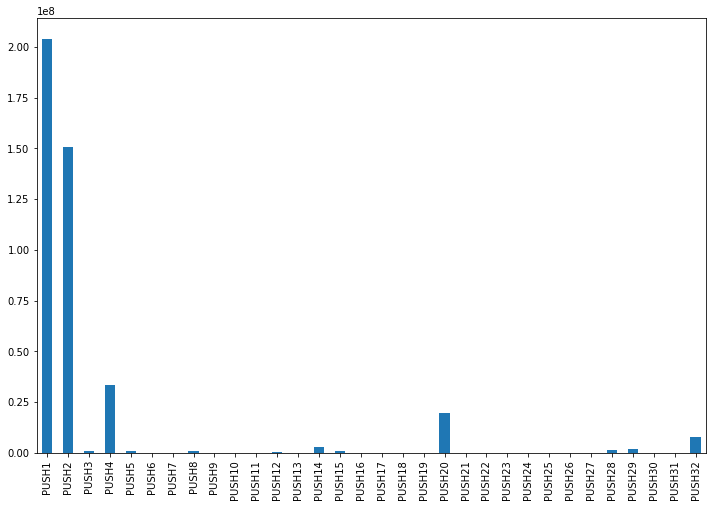

In [22]:
df[['PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32']].sum().plot(kind='bar')


## Show histogram of all PUSH opcodes and others used to push 00 on the stack (MSIZE, CALLDATASIZE, RETURNDATASIZE)

<AxesSubplot:>

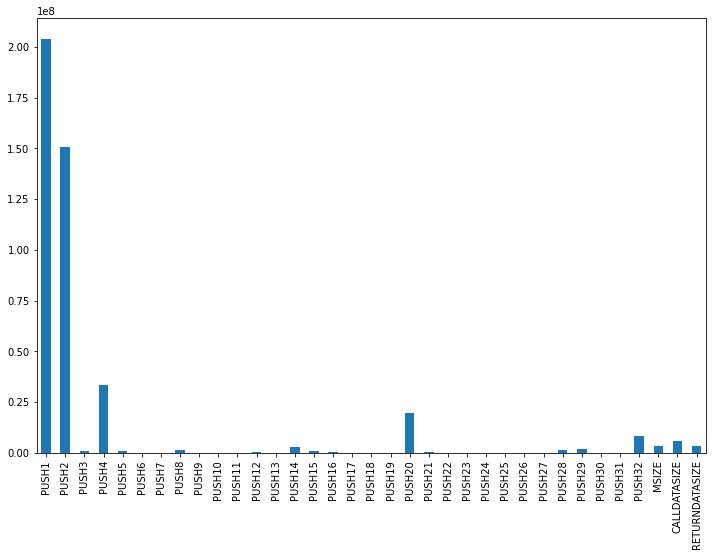

In [23]:
df[['PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32', 'MSIZE', 'CALLDATASIZE', 'RETURNDATASIZE']].sum().plot(kind='bar')

## Show histogram of all PUSH opcodes, separate PUSH pushing 00 on the stack, and others used to push 00 on the stack (MSIZE, CALLDATASIZE, RETURNDATASIZE)

<AxesSubplot:>

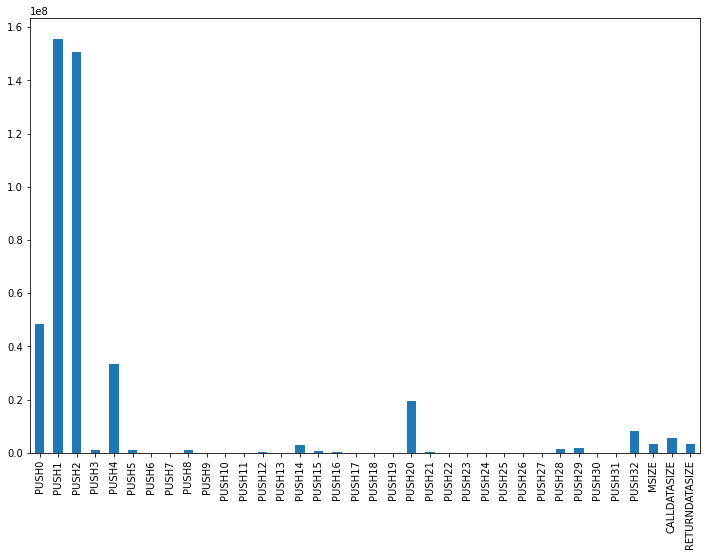

In [24]:
df2 = df.copy()
df2['PUSH1'] = df2['PUSH1'] - df2['PUSH0']
df2[['PUSH0', 'PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32', 'MSIZE', 'CALLDATASIZE', 'RETURNDATASIZE']].sum().plot(kind='bar')